In [1]:
import pandas as pd

data = pd.read_csv('data/^NDX_raw_data.csv')
data.rename(columns={'Date': 'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace=True)

In [2]:
data = data.iloc[:3524]

Dominant Frequency: 4.99 Hz
Predicted Value at t=1.2: -0.0753268055279366


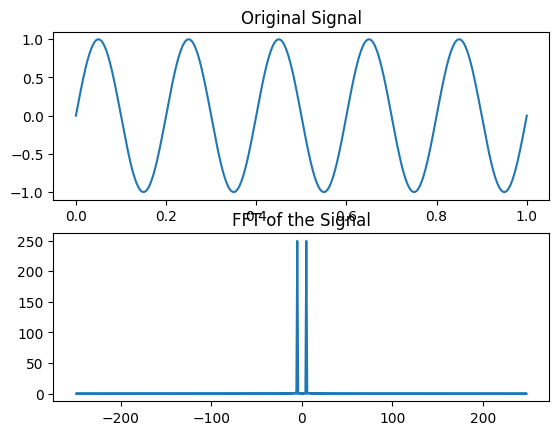

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Sample data: a periodic signal
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz signal

# Perform Fourier Transform
signal_fft = fft(signal)
frequencies = np.fft.fftfreq(len(signal), t[1] - t[0])

# Identify the dominant frequency
dominant_frequency = frequencies[np.argmax(np.abs(signal_fft))]

# Use the dominant frequency to predict future values
# Assuming we want to predict the value at time t_pred
t_pred = 1.2  # some future time
predicted_value = np.sin(2 * np.pi * dominant_frequency * t_pred)

print(f"Dominant Frequency: {dominant_frequency} Hz")
print(f"Predicted Value at t={t_pred}: {predicted_value}")

# Plot the original signal and its FFT
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(signal_fft))
plt.title('FFT of the Signal')

plt.show()


Identified Period: 1.002004008016032 seconds
Current Phase at t=2.5: 0.4950000000000003 (fraction of period)
Predicted Value at t=12.5: -0.9999950454033061


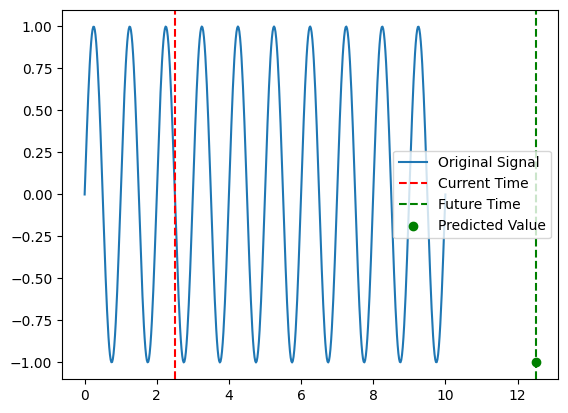

In [3]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Sample data: a periodic signal
t = np.linspace(0, 10, 500)
signal = np.sin(2 * np.pi * 1 * t)  # 1 Hz signal

# Step 1: Identify the Period
signal_fft = fft(signal)
frequencies = np.fft.fftfreq(len(signal), t[1] - t[0])
dominant_frequency = frequencies[np.argmax(np.abs(signal_fft))]
period = 1 / dominant_frequency

# Step 2: Compute the Phase
def compute_phase(t, period):
    return (t % period) / period

t_current = 2.5
current_phase = compute_phase(t_current, period)

# Step 3: Predict Future Value
def predict_value(t_future, period, signal, t):
    future_phase = compute_phase(t_future, period)
    closest_index = int(future_phase * len(t) % len(t))
    return signal[closest_index]

t_future = 12.5
predicted_value = predict_value(t_future, period, signal, t)

# Output Results
print(f"Identified Period: {period} seconds")
print(f"Current Phase at t={t_current}: {current_phase} (fraction of period)")
print(f"Predicted Value at t={t_future}: {predicted_value}")

# Plot the signal and indicate the prediction
plt.plot(t, signal, label='Original Signal')
plt.axvline(x=t_current, color='r', linestyle='--', label='Current Time')
plt.axvline(x=t_future, color='g', linestyle='--', label='Future Time')
plt.scatter(t_future, predicted_value, color='g', label='Predicted Value')
plt.legend()
plt.show()


In [4]:
import numpy as np

def project_points_onto_sphere(points, radius=1.0, center=(0, 0, 0)):
    """
    Projects a set of 3D points onto the surface of a sphere.
    
    Parameters:
    points (numpy.ndarray): Array of points with shape (n, 3).
    radius (float): Radius of the sphere.
    center (tuple): Center of the sphere (x, y, z).
    
    Returns:
    numpy.ndarray: Array of projected points with shape (n, 3).
    """
    # Convert center to a numpy array
    center = np.array(center)
    
    # Shift points so that the sphere is centered at the origin
    shifted_points = points - center
    
    # Compute the norms of the shifted points
    norms = np.linalg.norm(shifted_points, axis=1, keepdims=True)
    
    # Normalize the points
    normalized_points = shifted_points / norms
    
    # Scale the normalized points by the radius
    projected_points = radius * normalized_points
    
    # Shift the points back to the original center
    projected_points += center
    
    return projected_points

# Example usage
points = np.array([
    [1, 2, 3],
    [-1, -1, 0],
    [2, 2, 2],
    [0, -3, 1]
])

radius = 1.0
center = (0, 0, 0)

projected_points = project_points_onto_sphere(points, radius, center)

print("Original Points:\n", points)
print("Projected Points:\n", projected_points)


Original Points:
 [[ 1  2  3]
 [-1 -1  0]
 [ 2  2  2]
 [ 0 -3  1]]
Projected Points:
 [[ 0.26726124  0.53452248  0.80178373]
 [-0.70710678 -0.70710678  0.        ]
 [ 0.57735027  0.57735027  0.57735027]
 [ 0.         -0.9486833   0.31622777]]


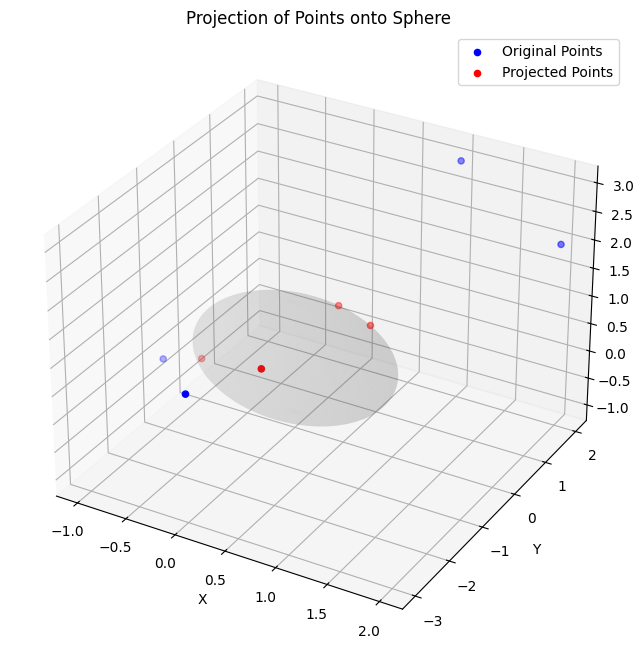

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def project_points_onto_sphere(points, radius=1.0, center=(0, 0, 0)):
    """
    Projects a set of 3D points onto the surface of a sphere.
    
    Parameters:
    points (numpy.ndarray): Array of points with shape (n, 3).
    radius (float): Radius of the sphere.
    center (tuple): Center of the sphere (x, y, z).
    
    Returns:
    numpy.ndarray: Array of projected points with shape (n, 3).
    """
    # Convert center to a numpy array
    center = np.array(center)
    
    # Shift points so that the sphere is centered at the origin
    shifted_points = points - center
    
    # Compute the norms of the shifted points
    norms = np.linalg.norm(shifted_points, axis=1, keepdims=True)
    
    # Normalize the points
    normalized_points = shifted_points / norms
    
    # Scale the normalized points by the radius
    projected_points = radius * normalized_points
    
    # Shift the points back to the original center
    projected_points += center
    
    return projected_points

# Example usage
points = np.array([
    [1, 2, 3],
    [-1, -1, 0],
    [2, 2, 2],
    [0, -3, 1]
])

radius = 1.0
center = (0, 0, 0)

projected_points = project_points_onto_sphere(points, radius, center)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Original points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', label='Original Points')

# Projected points
ax.scatter(projected_points[:, 0], projected_points[:, 1], projected_points[:, 2], c='r', label='Projected Points')

# Plot the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='gray', alpha=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Projection of Points onto Sphere')
ax.legend()

plt.show()


In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load example data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale')  # gamma='scale' uses 1 / (n_features * X.var()) as value of gamma

# Train the model
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred = svm_rbf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

